# SPRINT 7 - PROJECT

## Descripción del Proyecto

Estás trabajando como analista para **Zuber**, una nueva empresa de viajes compartidos que se está lanzando en Chicago. 

Tu tarea es encontrar patrones en la información disponible. 

Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes. 
Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

## Prueba la Hipótesis

'La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos'

## 1. IMPORTAR LIBRERIAS Y ARCHIVOS

### 1.1 Importar las Librerias

In [1]:
# importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from scipy import stats as st 

### Cargar los Datasets

In [2]:
# Cargar dataset 'taxi_trips' con información de las compañías de taxis
taxi_trips = pd.read_csv("moved_project_sql_result_01.csv")

# Cargar dataset 'dropoff_trips' con información sobre los viajes en Chicago 
dropoff_trips = pd.read_csv('moved_project_sql_result_04.csv')

# Cargar dataset 'loop_ohare_trips' con información sobre viajes desde Loop hasta O'Hare
loop_ohare_trips = pd.read_csv('moved_project_sql_result_07.csv')

### Analizar los Datos

#### Dataset: taxi_trips

In [3]:
# Abrir archivo con información de las compañías de taxi
taxi_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
# Examinar la información general del dataset
taxi_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
# Comprobar algunos valores descriptivos del dataset 
taxi_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
# Verifiar si existen valores duplicados
taxi_trips_duplicates = taxi_trips.duplicated().sum()
taxi_trips_duplicates

0

#### Dataset: dropoff_trips

In [7]:
# Abrir y leer archivo con información sobre los viajes en Chicago
dropoff_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
# Examinar la información general del dataset
dropoff_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
# Comprobar algunos valores descriptivos del dataset
dropoff_trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [10]:
# Verifiar si existen valores duplicados
dropoff_duplicates = dropoff_trips.duplicated().sum()
dropoff_duplicates

0

#### Dataset: loop_ohare_trips

In [11]:
# Abrir y leer archivo con información sobre viajes desde Loop hasta O'Hare
loop_ohare_trips.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [12]:
# Buscar valores únicos en las condiciones climatológicas
loop_ohare_trips['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [13]:
# Examinar la información general del dataset
loop_ohare_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
# Comprobar algunos valores descriptivos del dataset
loop_ohare_trips.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [15]:
# Verifiar si existen valores duplicados
loop_ohare_duplicates = loop_ohare_trips.duplicated().sum()
loop_ohare_duplicates

197

In [16]:
# Identifica las filas duplicadas en el DataFrame
duplicated_rows = loop_ohare_trips[loop_ohare_trips.duplicated()]
duplicated_rows

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


<div class="alert alert-block alert-info">
<b>Mis Comentarios</b> <a class="tocSkip"></a>

Comprobé los datos para encontrar duplicados para los tres datasets con los que estoy trabajando, en los primeros dos:
- 'taxi_trips' y 'dropoff_trips' no encontré valores duplicados. 
- En 'loop_ohare_trips' encontré 197 filas duplicadas, sin embargo, al analizar la información asumo que la columna 'weather_conditions' únicamente contiene 2 valores únicos: 'Good' y 'Bad' y como la tabla tiene información sobre la fecha y duración de los viajes (en números redondeados) puedo concluir que hay cierta posibilidad de que algunos viajes desde Loop hasta O'Hare puedan tener la misma duración en minutos, y se hayan realizado el mismo día, por lo que decido proceder con mi análisis conservando estos valores. 
</div>

### 1.3 Modificar los Datos

#### **COMENTARIO.**

Dataset: 'dropoff_trips'.

Los datos de la columna 'average_trips' aparecen como del tipo 'float' (con varios decimales) por lo que decidí simplificar un poco más el análisis y convertir los datos a 'integer' para facilitar el análisis y la interpretación. 

In [17]:
# Cambiar el tipo de datos de float a integer en la columna 'average_trips'
dropoff_trips['average_trips'] = dropoff_trips['average_trips'].astype('int')
dropoff_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


In [18]:
# Comprobar los cambios realizados
dropoff_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


#### **COMENTARIO.**

Dataset: 'loop_ohare_trips'.

Los datos de la columna 'start_ts' aparecían como 'object', sin embargo, expresaban fecha y horario, por lo que decidí cambiar el tipo de datos a 'datetime' que es el adecuado para este tipo de información. 

In [19]:
# Cambiar el tipo de datos a 'datetime' y redondear las cifras (cambiar a 'integer')
loop_ohare_trips['start_ts'] = pd.to_datetime(loop_ohare_trips['start_ts'], format = '%Y-%m-%d %H:%M:%S')
loop_ohare_trips['duration_seconds'] = loop_ohare_trips['duration_seconds'].astype(int)
loop_ohare_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 21.0+ KB


#### **COMENTARIO.**

Dataset: 'loop_ohare_trips'.

Al momento de obtener los datos con la función 'describe' se observa un mínimo de 0, lo que quiere decir que existen algunos viajes con una duración de cero, voy a identificarlos y eliminarlos para obtener mejores resultados en la etapa de análisis.

In [20]:
# Comprobar el número de filas con una duración de 0 segundos
loop_ohare_trips.query('duration_seconds == 0').count()

start_ts              6
weather_conditions    6
duration_seconds      6
dtype: int64

In [21]:
# Eliminar las filas que no son necesarias para el análisis
loop_ohare_trips = loop_ohare_trips.query('duration_seconds != 0')
loop_ohare_trips.describe()

,start_ts,duration_seconds
count,1062,1062.000000
mean,2017-11-11 11:44:34.576271360,2083.435970
min,2017-11-04 00:00:00,60.000000
25%,2017-11-04 15:00:00,1440.000000
50%,2017-11-11 09:00:00,1980.000000
75%,2017-11-18 05:00:00,2580.000000
max,2017-11-25 23:00:00,7440.000000
std,NaN,755.651796


In [22]:
# Comprobar los valores descriptivos de la columna 'duration_seconds'
loop_ohare_trips['duration_seconds'].describe()

count    1062.000000
mean     2083.435970
std       755.651796
min        60.000000
25%      1440.000000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

## 2. Analizar los Datos

### 2.1 Identificar el Top 10 'barrios' para Finalizar un Recorrido

In [23]:
# Identificar Top 10 barrios (lugares) más populares para finalizar el recorrido
top_10_dropoff_points = dropoff_trips.sort_values(by='average_trips', ascending=False).head(10)
top_10_dropoff_points

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


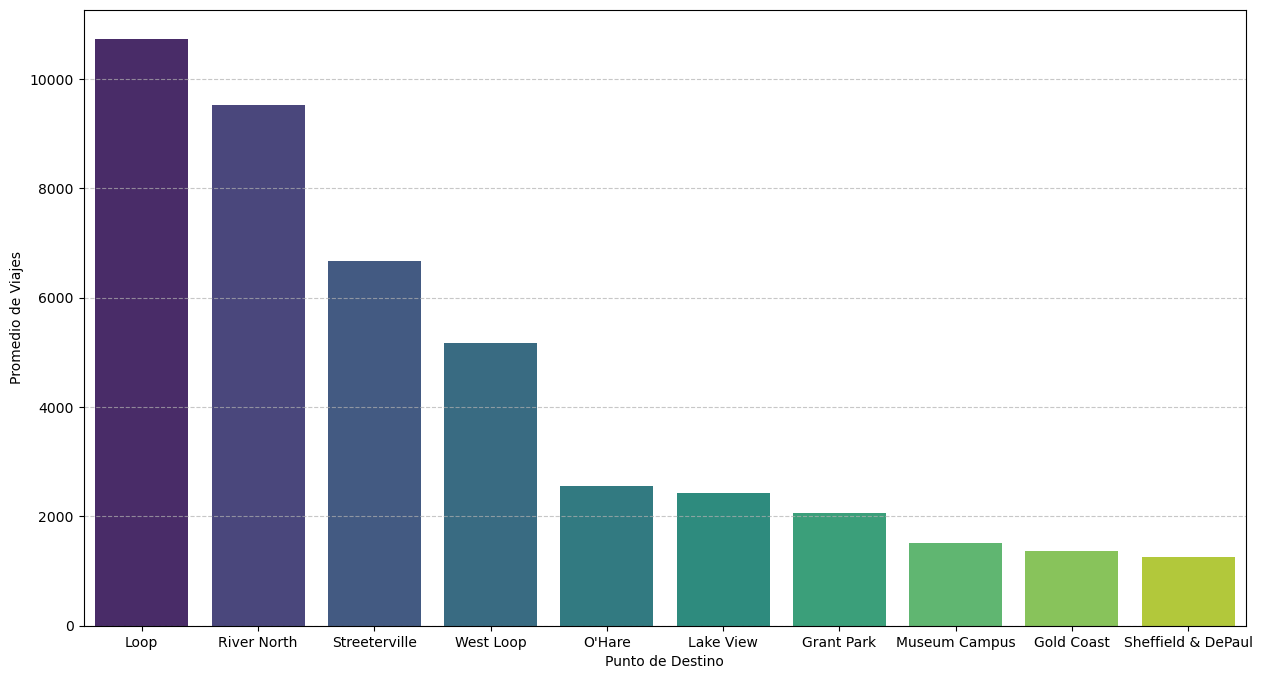

In [24]:
# Graficar los resultados
plt.figure(figsize=(15, 8))
splot = sns.barplot(data=top_10_dropoff_points, x='dropoff_location_name', y='average_trips', palette='viridis')

plt.xlabel('Punto de Destino')  
plt.ylabel('Promedio de Viajes')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.show()


#### **COMENTARIO.**

Basándonos en nuestro análisis del Top 10 de lugares para finalizar un recorrido, podemos observar que:

- La ubicación más popular para finalizar es el 'Loop', que tiene el mayor número de viajes.
- Podemos dividir los resultados en 2 categorías (o 3 si queremos ser más específicos), los más populares van desde el 'Loop' hasta 'West Loop'; la siguiente categoría estaría conformada por el aeropuerto 'O'Hare' hasta 'Grant Park'; y la última categoría más demandada va desde 'Museum Campus' hasta 'Sheffield & DePaul'.

Al centrarnos en estas ubicaciones principales, especialmente en el 'Loop' y las otras 3 regiones de alta demanda, podemos posicionar estratégicamente nuestros servicios de viajes compartidos para satisfacer las necesidades de los clientes y garantizar un transporte eficiente en Chicago.

### 2.2 Top 10 Compañías de Taxi por Número de Viajes

In [25]:
# Visualizar las compañías de taxi con el mayor número de viajes promedio
top_taxi_trips = taxi_trips.sort_values(by='trips_amount', ascending=False).head(10)
top_taxi_trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


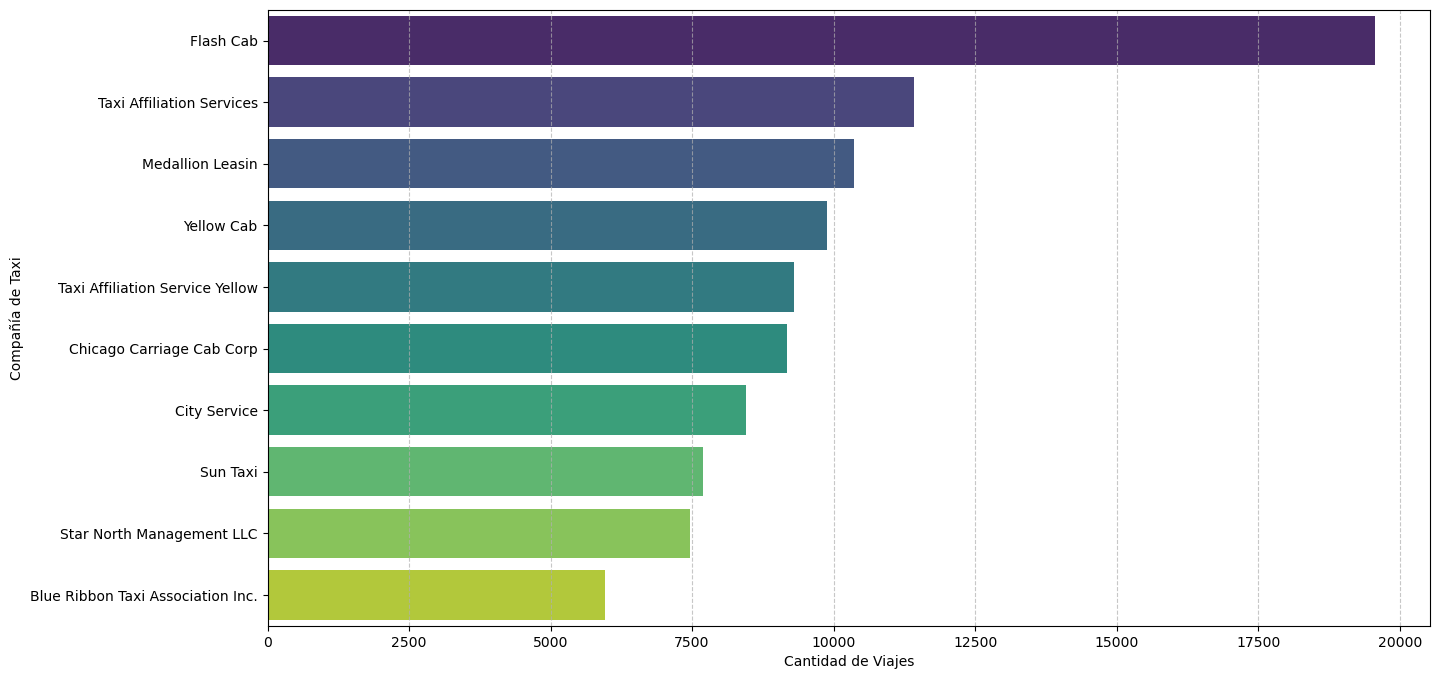

In [26]:
# Graficar los resultados
plt.figure(figsize=(15, 8))
splot = sns.barplot(data=top_taxi_trips, x='trips_amount', y='company_name', palette='viridis')

plt.xlabel('Cantidad de Viajes')  
plt.ylabel('Compañía de Taxi')  
plt.grid(axis='x', linestyle='--', alpha=0.7)  

plt.show()

#### **COMENTARIO.**

Tras analizar el conjunto de datos de viajes en taxi, descubrí las siguientes observaciones: 

- Flash Cab se establece como el claro líder, superando a otras empresas de taxis por un margen significativo en cuanto al volumen de viajes.
- Entre las 10 principales empresas de taxis, tres de ellas han superado la cifra de 10,000 viajes, lo que las destaca y posiciona claramente como las líderes en el mercado.

De la misma manera que en el análisis anterior, podemos dividir este Top 10 en 3 categorías: 
- **Primera:** Claramente existe solo una compañía dentro de esta categoría, 'Flash Cab', pues supera con un poco menos del doble a su mas cercano competidor.
- **Segunda:** Lo conforman las compañías que superan los 7,500 hasta los 12,500 viajes. Podemos catalogar como Compañías con fuerte presencia y posibilidad de crear estrategias para competir en el mercado alto.
- **Tercera:** Las empresas que no rebasan los 7,500 viajes, incluso podemos incluir 'Sun Taxi' que apenas rebasa esa cantidad. 


## 3. Prueba de Hipótesis

### Prueba la hipótesis:

**"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".**

#### **COMENTARIO.**

En el conjunto de datos 'loop_ohare-trips', tenemos los datos de tiempo de viaje y las condiciones climáticas, específicamente categorizadas como 'good' (clima soleado) o 'bad' (clima lluvioso).

Con el fin de realizar pruebas de hipótesis, evaluaré las siguientes hipótesis:

- **H0:** La duración promedio del viaje desde el Loop hasta el Aeropuerto Internacional O'Hare permanece igual en los sábados lluviosos.
- **H1:** La duración promedio del viaje desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en los sábados lluviosos.

1. Para realizar esta prueba, utilizaré el método **st.ttest_ind(  )**, que permite evaluar la igualdad de medias entre dos poblaciones estadísticas distintas. 
    - Para empezar, crearé dos poblaciones de datos separadas basadas en las condiciones climáticas ('good' y 'bad'). 
    - Después, examinaré la columna 'duration_seconds' y aplicaremos la prueba de hipótesis a estas dos poblaciones.

2. Para establecer un nivel de significancia, emplearé un **valor alfa del 5%.** 
    - Si el valor p resultante es menor que 5%, rechazaremos la hipótesis nula (H0), indicando que las duraciones promedio de viaje entre las dos poblaciones no son iguales. 
    - Por el contrario, si el valor p es mayor que 5%, aceptaremos la hipótesis nula (H0).

- Antes de realizar la prueba de hipótesis, verificaré inicialmente si las varianzas de los dos conjuntos de datos son equivalentes.



In [27]:
# Leer los datos
loop_ohare_trips.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


In [28]:
# Obtener una muestra aleatoria de los datos
loop_ohare_trips.sample(5)

,start_ts,weather_conditions,duration_seconds
550,2017-11-04 10:00:00,Good,2333
280,2017-11-25 06:00:00,Good,2842
750,2017-11-18 13:00:00,Bad,3420
521,2017-11-04 15:00:00,Good,3351
81,2017-11-11 06:00:00,Good,1346


In [29]:
# Filtrar población de datos de buen clima ('Good')
loop_ohare_good = loop_ohare_trips.query('weather_conditions == "Good"')
loop_ohare_good.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 0 to 1066
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            882 non-null    datetime64[ns]
 1   weather_conditions  882 non-null    object        
 2   duration_seconds    882 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 24.1+ KB


In [30]:
# Filtrar población de datos de mal clima ('Bad')
loop_ohare_bad = loop_ohare_trips.query('weather_conditions == "Bad"')
loop_ohare_bad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 6 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            180 non-null    datetime64[ns]
 1   weather_conditions  180 non-null    object        
 2   duration_seconds    180 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 4.9+ KB


In [31]:
# Varianza de 'Good' (weather) dataset
loop_ohare_good['duration_seconds'].var()

552889.2319951821

In [32]:
# Varianza de 'Bad' (weather) dataset
loop_ohare_bad['duration_seconds'].var()

520294.08600248274

### **COMENTARIO.**

Para verificar si las varianzas de los dos conjuntos de datos son similares, realizaré la prueba de **Levene** utilizando el **método st.levene(  )**. 

Utilizaré los datos de la columna **'duration_seconds'** de cada conjunto de datos como entrada, con el parámetro **center='mean'**.

El **umbral o valor alfa** se establecerá en un nivel de significancia **del 5%.** 
- Si el **valor p resultante es mayor que alfa**, concluiré que las varianzas de los dos conjuntos de datos son **iguales o homogéneas**. 
- Por el contrario, si el **valor p es menor que alfa**, consideraré que las varianzas son **diferentes o heterogéneas**.

In [33]:
# Comprobar la diferencia de varianzas de ambos datasets
alpha = 0.05 
result = st.levene(loop_ohare_good['duration_seconds'], loop_ohare_bad['duration_seconds'], center='mean')
print('p-value:', result.pvalue)
if result.pvalue > alpha:
    print('Las varianzas de ambos conjuntos de datos son más o menos similares')
else:
    print('Las varianzas de ambos conjuntos de datos están demasiado alejadas')

p-value: 0.5149422013161751
Las varianzas de ambos conjuntos de datos son más o menos similares


In [34]:
# Prueba de hipótesis
alpha = 0.05
results = st.ttest_ind(loop_ohare_good['duration_seconds'], loop_ohare_bad['duration_seconds'], equal_var=True)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la H0 - La duración promedio del viaje desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en los sábados lluviosos")
else:
    print("Aceptamos la H0 - La duración promedio del viaje desde el Loop hasta el Aeropuerto Internacional O'Hare permanece igual en los sábados lluviosos")


p-value: 1.3318772977743245e-11
Rechazamos la H0 - La duración promedio del viaje desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en los sábados lluviosos


### **COMENTARIO.**

El valor p obtenido de la prueba t comparando las duraciones promedio de viaje entre las condiciones de buen clima (Good) y mal clima (Bad) es menor que el valor alfa elegido de 0.05. 

**Por lo tanto, rechazamos la hipótesis nula.**

Conforme a este resultado, **se puede concluir que la duración promedio del viaje desde el Loop hasta el Aeropuerto Internacional O'Hare SI cambia en los sábados lluviosos.**

## 4. Conclusión

En conclusión, de acuerdo con el análisis: 
1. Las principales empresas de taxis preferidas por los pasajeros en Chicago son Flash Cab, Taxi Affiliation Services y Medallion Leasing.
2. Flash Cab destaca como la opción más popular. Además, las ubicaciones de finalizar un viaje más frecuentadas son el Loop, River North y Streeterville.

Respecto a la prueba de hipótesis: 
- Enfocada en averiguar el impacto del clima en la duración del viaje, se encontró evidencia para respaldar la **Hipótesis Alternativa (H1)** y afirmar que la duración promedio del viaje SI cambia en los sábados lluviosos de Chicago. 


<div class="alert alert-block alert-info">
<b>Mis Comentarios</b> <a class="tocSkip"></a>

CONCLUSIÓN.
- En este proyecto, de acuerdo a la información proporcionada, importé las librerías que consideré necesarias para analizar y manipular los datos, pues sabía que tendría que realizar algunos análisis y mostrar la información de forma gráfica.
- Los datos los obtuve de tres tablas en formato de archivo 'csv', que tuve que leer para poder analizar la información.
- En el paso siguiente, para los tres datasets obtuve información general, sobre el número de columnas, número de filas, si había o no valores ausentes, algunas características descriptivas donde aplicaba como sumas, promedio, mínimo, máximo, etc. y verificar si había filas duplicadas.
- Al momento de analizar la información decidí hacer algunas modificaciones como cambiar algunos tipos de datos, redondear algunas cantidades, eliminar algunas de las filas que consideré contenían valores no representativos, como lo explico en los comentarios de esta sección, realicé una limpieza de los datos para que los resultados fueran realmente representativos.
- Para tener un mejor panorama, la primer tarea fue obtener el Top 10 de barrios (lugares) más populares para finalizar un recorrido de Taxi en la ciudad de Chicago.
- Otro dato interesante, fue el de encontrar el Top 10 de las compañías de Taxi con más viajes (en promedio) para la ciudad de Chicago, un ejercicio similar al anterior donde utilicé el método 'sort_values' para encontrar el Top 10 respectivamente.
- Finalmente, está el objetivo de este estudio, la prueba de hipótesis y comprobar "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos". Doy los detalles específicos en cada uno de mis comentarios del proceso, en donde obtuve primeramente dos grupos para realizar la prueba, divididos por las condiciones climatológicas entre buenas y malas, para cada uno de los grupos obtuve la varianza y mediante una prueba ttest, con un grado de sifnificacion del 0.05 concluí que SI cambian la duración promedio de los viajes en Taxi desde Loop hasta el aeropuerto O'Hare para los días sábados y lluviosos.
</div>